In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix_titles_2021.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8801,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,������������,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,3,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [8]:
result  = pd.concat( [df.nunique() , df.count()] , axis=1, keys= ['Unique values', 'Count'])
result

,Unique values,Count
show_id,8807,8807
type,2,8807
title,8801,8807
director,4528,6173
cast,7692,7982
country,748,7976
date_added,1767,8797
release_year,74,8807
rating,17,8803
duration,220,8804


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

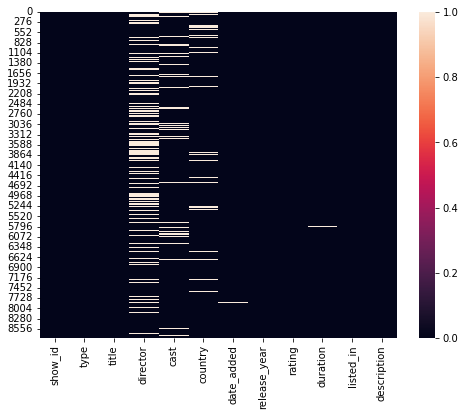

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.show()

# Data Cleaning

In [11]:
new_df = df.copy()
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
new_df.fillna( {'director' : 'missing' , 
                'cast' : 'missing' ,
                'country' : 'missing' ,  
                'duration' : 'missing',
                'rating' : 'missing'} , inplace=True)
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
new_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [14]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


# Exploratory Data Analysis Questions

<span style="font-size: 16px;">1. How many TV shows & Movies are in the dataset? Show using Bar chart</span>

In [15]:
number = new_df['type'].value_counts().to_frame('Count')
number

,Count
Movie,6131
TV Show,2676


<BarContainer object of 2 artists>

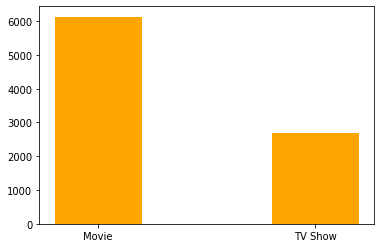

In [16]:
# new_df['type'].value_counts()
plt.bar(new_df['type'].unique() ,new_df['type'].value_counts() , width=0.4, color='orange')

In [17]:
new_df['date_added'] = pd.to_datetime(df['date_added'])

In [18]:
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
new_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [20]:
new_df['month'] = new_df['date_added'].dt.month
new_df['year_added'] = new_df['date_added'].dt.year

In [21]:
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0


In [22]:
new_df.corr()

,release_year,month,year_added
release_year,1.000000,-0.039179,0.111531
month,-0.039179,1.000000,-0.160421
year_added,0.111531,-0.160421,1.000000


<AxesSubplot: >

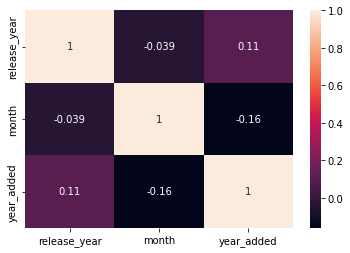

In [23]:
sns.heatmap(new_df.corr() , annot=True)

<span style="font-size: 16px;"> 2. Distribution of Ratings? & What are the different rating defined by Netflix? </span>

In [24]:
ratings_given = new_df.rating.value_counts()
ratings_unique = new_df.rating.nunique()
ratings_given, ratings_unique 

(TV-MA       3207
 TV-14       2160
 TV-PG        863
 R            799
 PG-13        490
 TV-Y7        334
 TV-Y         307
 PG           287
 TV-G         220
 NR            80
 G             41
 TV-Y7-FV       6
 missing        4
 NC-17          3
 UR             3
 74 min         1
 84 min         1
 66 min         1
 Name: rating, dtype: int64,
 18)

<BarContainer object of 18 artists>

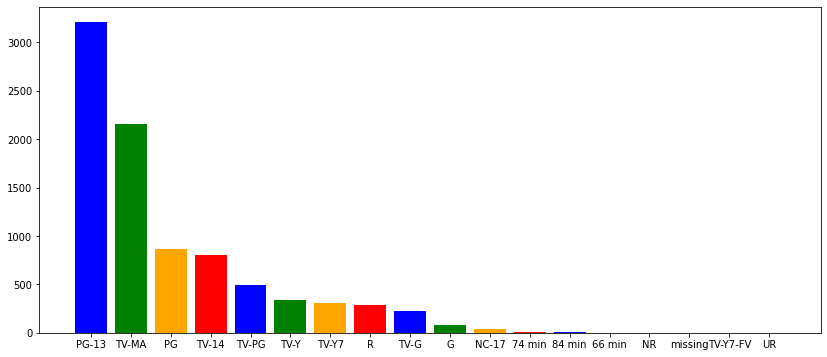

In [25]:
colors = ['blue', 'green', 'orange', 'red']
plt.figure(figsize=(14,6))
plt.bar(new_df.rating.unique() , ratings_given, color=colors)

<span style="font-size: 16px;"> 3. What are the Top Genres? Display using bar chart </span>

In [26]:
# To count the maximum number of Genres
print(new_df['listed_in'].str.count(',').max())

2


In [27]:
new_df[['Genre 1', 'Genre 2', 'Genre 3']] = new_df['listed_in'].str.split(',', expand=True)

In [28]:
new_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year_added,Genre 1,Genre 2,Genre 3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0,Documentaries,None,None
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0,Crime TV Shows,International TV Shows,TV Action & Adventure


In [29]:
Gen1 = new_df['Genre 1'].value_counts()
Gen1 = Gen1.reset_index()
Gen1.columns = ['Category', 'Count']
Gen1.head()

,Category,Count
0,Dramas,1600
1,Comedies,1210
2,Action & Adventure,859
3,Documentaries,829
4,International TV Shows,774


In [30]:
Gen2 =new_df['Genre 2'].value_counts()
Gen2 = Gen2.reset_index()
Gen2.columns = ['Category', 'Count']
Gen2.head()

,Category,Count
0,International Movies,1722
1,Dramas,758
2,Independent Movies,576
3,International TV Shows,476
4,Comedies,452


In [31]:
Gen3 =new_df['Genre 3'].value_counts()
Gen3 = Gen3.reset_index()
Gen3.columns = ['Category', 'Count']
Gen3.head()

,Category,Count
0,International Movies,902
1,Romantic Movies,442
2,TV Dramas,376
3,Thrillers,280
4,Music & Musicals,209


In [32]:
Gen1['Category'] = Gen1.Category.str.strip()
Gen2['Category'] = Gen2.Category.str.strip()
Gen3['Category'] = Gen3.Category.str.strip()

In [33]:
genre_merge = pd.merge(pd.merge(Gen1,Gen2,on='Category'),Gen3,on='Category')

In [34]:
genre_merge['Total_Count'] = genre_merge['Count_x'] + genre_merge['Count_y'] + genre_merge['Count'] 
genre_merge.drop(['Count_x','Count_y','Count'] , axis=1 , inplace=True)

In [35]:
result = genre_merge.sort_values(by= 'Total_Count' , ascending=False)
result = result.head()
result

,Category,Total_Count
8,International Movies,2752
0,Dramas,2427
1,Comedies,1674
3,International TV Shows,1351
2,Documentaries,869


<BarContainer object of 5 artists>

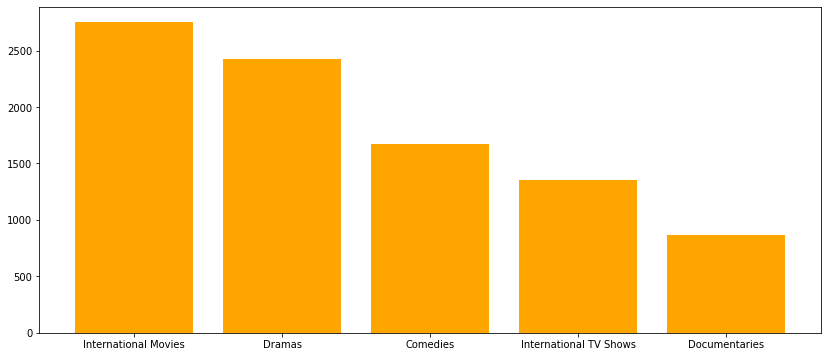

In [36]:
plt.figure(figsize=(14,6))
plt.bar(result.Category, result.Total_Count , color='orange')

<span style="font-size: 16px;"> 4. In which year highest number of the TV shows & Movies were released? show with Bar Graph. 
 </span>

In [37]:
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year_added,Genre 1,Genre 2,Genre 3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0,Documentaries,None,None
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0,International TV Shows,Romantic TV Shows,TV Comedies


In [38]:
movies_year = new_df['release_year'].value_counts().sort_values(ascending=False).head()
movies_year 

2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: release_year, dtype: int64

<BarContainer object of 5 artists>

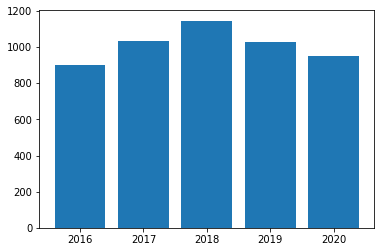

In [39]:
plt.bar(movies_year.index , movies_year.values)

<span style="font-size: 16px;">5. What is the show id and director for '365 Days' </span>

In [40]:
result = new_df[new_df['title'] == '365 Days']
result[['show_id' , 'director']]

,show_id,director
2412,s2413,"Barbara Bia������ow������s, Tomas"


<span style="font-size: 16px;">5. Show only the title of all TV shows that were released in India only </span>

In [41]:
result = new_df[new_df['country'] == 'India']
result[['title']]

,title
4,Kota Factory
24,Jeans
39,Chhota Bheem
50,Dharmakshetra
66,Raja Rasoi Aur Anya Kahaniyan
...,...
8773,Yanda Kartavya Aahe
8775,Yeh Meri Family
8798,Zed Plus
8799,Zenda


<span style="font-size: 16px;">6. Show top 10 director, who gave the highest number of TV shows & Movies to Netflix? </span>

In [42]:
director = new_df.director.value_counts().head(11)
director = director.drop('missing' , axis=0)
director

Rajiv Chilaka              19
Ra������l Campos, Jan S    18
Suhas Kadav                16
Marcus Raboy               16
Jay Karas                  14
Cathy Garcia-Molina        13
Jay Chapman                12
Youssef Chahine            12
Martin Scorsese            12
Steven Spielberg           11
Name: director, dtype: int64

<AxesSubplot: >

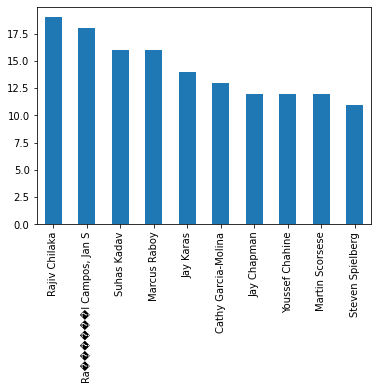

In [43]:
director.plot(kind='bar')

<span style="font-size: 16px;"> 7. In how many movies/ tv shows, 'Leonardo DiCaprio' was cast? </span>

In [44]:
new_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year_added,Genre 1,Genre 2,Genre 3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0,Documentaries,None,None
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0,International TV Shows,TV Dramas,TV Mysteries


In [45]:
actor = new_df[new_df['cast'].str.contains('Leonardo DiCaprio')]
actor

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year_added,Genre 1,Genre 2,Genre 3
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada",2021-08-01,2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,8.0,2021.0,Dramas,None,None
340,s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom",2021-08-01,2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,8.0,2021.0,Action & Adventure,Sci-Fi & Fantasy,Thrillers
392,s393,Movie,Django Unchained,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",United States,2021-07-24,2012,R,165 min,"Action & Adventure, Dramas","Accompanied by a German bounty hunter, a freed...",7.0,2021.0,Action & Adventure,Dramas,None
1358,s1359,Movie,Shutter Island,Martin Scorsese,"Leonardo DiCaprio, Mark Ruffalo, Ben Kingsley,...",United States,2021-02-01,2010,R,139 min,Thrillers,A U.S. marshal's troubling visions compromise ...,2.0,2021.0,Thrillers,None,None
1469,s1470,Movie,What's Eating Gilbert Grape,Lasse Hallstr���,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,2021-01-01,1993,PG-13,118 min,"Classic Movies, Dramas, Independent Movies","In a backwater Iowa town, young Gilbert is tor...",1.0,2021.0,Classic Movies,Dramas,Independent Movies
6272,s6273,Movie,Before the Flood,Fisher Stevens,Leonardo DiCaprio,United States,2018-02-01,2016,PG,97 min,Documentaries,Leonardo DiCaprio crisscrosses the globe to in...,2.0,2018.0,Documentaries,None,None
6826,s6827,Movie,Gangs of New York,Martin Scorsese,"Leonardo DiCaprio, Daniel Day-Lewis, Cameron D...","United States, Italy",2019-08-20,2002,R,167 min,Dramas,In the crime-ridden slums of New York in the 1...,8.0,2019.0,Dramas,None,None
7865,s7866,Movie,Revolutionary Road,Sam Mendes,"Leonardo DiCaprio, Kate Winslet, Kathy Bates, ...","United States, United Kingdom",2019-11-01,2008,R,120 min,"Dramas, Romantic Movies",April and Frank's marriage unravels when a pla...,11.0,2019.0,Dramas,Romantic Movies,None
8272,s8273,Movie,The Departed,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...","United States, Hong Kong",2021-01-01,2006,R,151 min,"Dramas, Thrillers",Two rookie Boston cops are sent deep undercove...,1.0,2021.0,Dramas,Thrillers,None


In [46]:
actor.shape

(9, 17)

<span style="font-size: 16px;">8. How many movies got the "TV-14" rating in the India? </span>

In [47]:
new_df[(new_df.rating == 'TV-14') & (new_df.country == 'India')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year_added,Genre 1,Genre 2,Genre 3
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,9.0,2021.0,Comedies,International Movies,Romantic Movies
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2021-09-05,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,9.0,2021.0,Action & Adventure,Comedies,Dramas
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,2021-09-02,1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist���������s dangerous ob...,9.0,2021.0,Dramas,International Movies,Thrillers
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,2021-09-02,2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...,9.0,2021.0,Dramas,International Movies,Thrillers
126,s127,Movie,Shikara,Vidhu Vinod Chopra,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ...",India,2021-09-02,2020,TV-14,115 min,"Dramas, International Movies, Romantic Movies",A couple must strive to remain resilient after...,9.0,2021.0,Dramas,International Movies,Romantic Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8770,s8771,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,2018-03-01,2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...,3.0,2018.0,Dramas,International Movies,Romantic Movies
8771,s8772,Movie,Yaara O Dildaara,Ksshitij Chaudhary,"Harbhajan Mann, Tulip Joshi, Kabir Bedi, Gulza...",India,2017-11-01,2011,TV-14,132 min,"Dramas, International Movies, Music & Musicals",The patriarch of a wealthy family with one ind...,11.0,2017.0,Dramas,International Movies,Music & Musicals
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,2017-05-01,2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ...",5.0,2017.0,Action & Adventure,Comedies,International Movies
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2.0,2018.0,Dramas,International Movies,None
